In [2]:
import numpy as np
import pandas as pd


In [ ]:

# Load the dataset (assuming 'input.xlsx' has the data)
df = pd.read_excel("Input.xlsx")

X = df[['x1', 'x2']].values  # Independent variables
y = df['y'].values          # Dependent variable

# Add a column of ones to X for the intercept term
X = np.c_[np.ones(X.shape[0]), X]  # Add a column of ones to X (for the intercept)

# Convert y to a column vector
y = y.reshape(-1, 1)

# Apply the OLS formula to calculate the regression coefficients: b = (X^T X)^(-1) X^T y
X_transpose = X.T  # Transpose of X
beta = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose).dot(y)  # Coefficients


In [14]:
X_transpose.dot(X) == X_transpose@X

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

Intercept (b0): 50.000000000000654
Coefficient for x1 (b1): 4.9999999999997655
Coefficient for x2 (b2): 8.526512829121202e-14
Predicted Values: [[60.]
 [65.]
 [70.]
 [75.]
 [80.]]


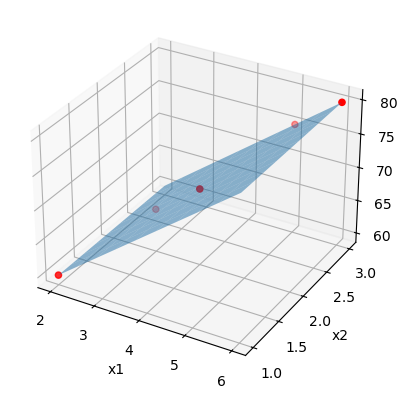

In [21]:

# Print the coefficients (including intercept)
print("Intercept (b0):", beta[0][0])  # Intercept term
print("Coefficient for x1 (b1):", beta[1][0])  # Coefficient for x1
print("Coefficient for x2 (b2):", beta[2][0])  # Coefficient for x2

# Predict the dependent variable (y) using the model
y_pred = X.dot(beta)

# Print the first few predictions
print("Predicted Values:", y_pred[:5])

# Optionally, visualize the results
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the original data
ax.scatter(df['x1'], df['x2'], df['y'], color='r')

# Create meshgrid for prediction surface
x1_range = np.linspace(df['x1'].min(), df['x1'].max(), 10)
x2_range = np.linspace(df['x2'].min(), df['x2'].max(), 10)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)

# Compute y values for the plane using the model coefficients
y_mesh = beta[0] + beta[1] * x1_mesh + beta[2] * x2_mesh

# Plot the regression plane
ax.plot_surface(x1_mesh, x2_mesh, y_mesh, alpha=0.5)

# Labels and show the plot
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

plt.show()


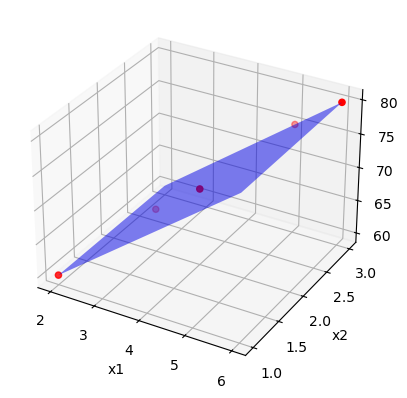

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the original data (x1, x2, y)
ax.scatter(df['x1'], df['x2'], df['y'], color='r', label='Data Points')

# Create meshgrid for prediction surface
x1_range = np.linspace(df['x1'].min(), df['x1'].max(), 10)
x2_range = np.linspace(df['x2'].min(), df['x2'].max(), 10)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)

# Compute y values for the plane using the model coefficients
y_mesh = beta[0] + beta[1] * x1_mesh + beta[2] * x2_mesh

# Plot the regression plane
ax.plot_surface(x1_mesh, x2_mesh, y_mesh, alpha=0.5, rstride=100, cstride=100, color='b', label='Regression Plane')

# Labels and show the plot
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

# Display the plot
plt.show()